In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

from sklearn import ensemble
import xgboost as xgb

In [2]:
dataset = pd.read_csv('C:/Users/69009/Desktop/last/441/problem/CALI.csv')
feature_names={"MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"}
df_x = pd.DataFrame(dataset, columns = feature_names)
df_y = pd.DataFrame(dataset, columns = {"HOUSING PRICE"})
for column in df_x.columns:
    df_x[column] = (df_x[column] - df_x[column].min()) / (df_x[column].max() - df_x[column].min())
df_x


,HouseAge,AveBedrms,MedInc,Latitude,AveOccup,AveRooms,Longitude,Population
0,0.784314,0.020469,0.539668,0.567481,0.001499,0.043512,0.211155,0.008941
1,0.392157,0.018929,0.538027,0.565356,0.001141,0.038224,0.212151,0.067210
2,1.000000,0.021940,0.466028,0.564293,0.001698,0.052756,0.210159,0.013818
3,1.000000,0.021929,0.354699,0.564293,0.001493,0.035241,0.209163,0.015555
4,1.000000,0.022166,0.230776,0.564293,0.001198,0.038534,0.209163,0.015752
5,1.000000,0.022835,0.243921,0.564293,0.001165,0.027757,0.209163,0.011491
6,1.000000,0.018321,0.217873,0.563231,0.001156,0.028964,0.209163,0.030578
7,1.000000,0.021596,0.180694,0.563231,0.000882,0.028011,0.209163,0.032344
8,0.803922,0.023250,0.108998,0.563231,0.001074,0.024443,0.208167,0.033717
9,1.000000,0.019472,0.220087,0.563231,0.001191,0.029238,0.209163,0.043387


In [3]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

In [4]:
params = {'n_estimators': 500, "objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.01,
                'max_depth': 4, 'alpha': 1}
xg_reg = xgb.XGBRegressor(**params)

xg_reg.fit(x_train,y_train)
y_predicted = xg_reg.predict(x_test)

[18:17:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [5]:
xg_reg.feature_importances_

array([0.06191953, 0.04073134, 0.40880224, 0.09781619, 0.15168677,
       0.13000618, 0.09757712, 0.01146065], dtype=float32)

In [6]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 0.30
Test Variance score: 0.77


[18:20:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


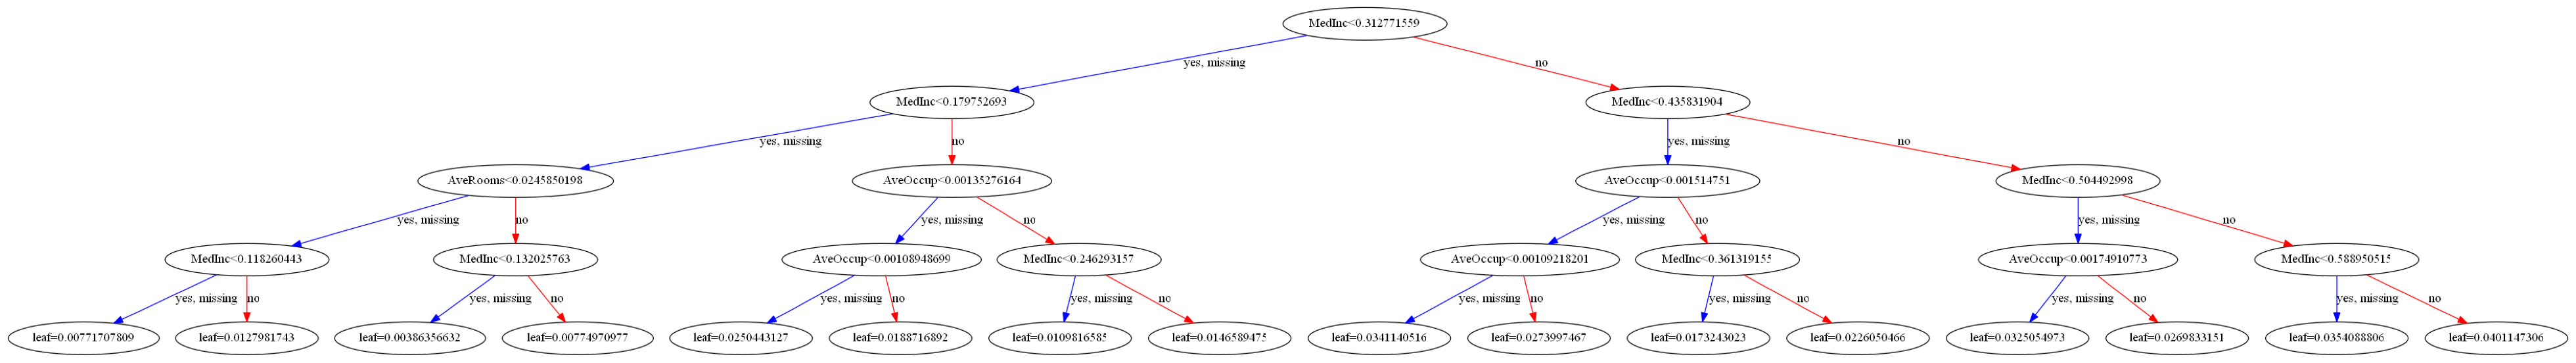

In [8]:
params = {"objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.01, 'max_depth': 4, 'alpha': 1}
data_dmatrix = xgb.DMatrix(data=df_x,label=df_y)
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_tree(xg_reg,num_trees=9)
plt.rcParams['figure.figsize'] = (70.0, 70.0)
plt.savefig('C:/Users/69009/Desktop/last/441/problem/XGB/fig1.jpg')
plt.show()